In [1]:
import sys
sys.path.append("/Users/alfieriek/Documents/GitHub/imputationLibrary")
from imputationLibrary import forwardFilling, randomSampleImputation, splineInterpolation
from imputationLibrary.util import util
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
import random
import numpy as np
warnings.filterwarnings('ignore')

TRAINING_SIZE = 749
TESTING_SIZE=250

files = ['seasonal_and_trend']

In [2]:
def remove_random_points(df_input, num_missing=200):
    df = df_input.copy()
    missing_places = random.sample(range(df.shape[0]), num_missing)
    for missing_place in missing_places:
        df.iloc[missing_place] = np.nan
    return df

# Seasonal and Trend Data with Forward Filling Imputations

In [3]:
# Reading Dataset
SeasonalTrend_Data = pd.read_csv('output/seasonal_and_trend_complete.csv', index_col=0)
SeasonalTrend_Data

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,92.185713
996,88.912198
997,88.058936
998,93.694939


In [4]:
# Removing 200 datapoints
SeasonalTrend_Data_NAs = remove_random_points(SeasonalTrend_Data, num_missing=200)
SeasonalTrend_Data_NAs

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,92.185713
996,88.912198
997,NaN
998,93.694939


In [5]:
# Forward Filing Imputing
SeasonalTrend_Data_NAs_Imputed = forwardFilling.inputTrainingData(SeasonalTrend_Data_NAs)
SeasonalTrend_Data_NAs_Imputed

,0
0,2.962612
1,3.405728
2,2.290910
3,2.603546
4,2.106807
...,...
995,92.185713
996,88.912198
997,88.912198
998,93.694939


In [ ]:
# Mean Square Error
mse = mean_squared_error(SeasonalTrend_Data_NAs_Imputed,SeasonalTrend_Data, squared=True)
mse

In [ ]:
print("Forward Filling Imputation")
util.plot(SeasonalTrend_Data, SeasonalTrend_Data_NAs, SeasonalTrend_Data_NAs_Imputed)

# Seasonal and Trend Data with Spline Interpolation

In [12]:
SeasonalTrend_Data_NAs_Spline = splineInterpolation.inputTrainingData(SeasonalTrend_Data, derivate_order=0)

Spline Interpolation Imputation derivative order = 0


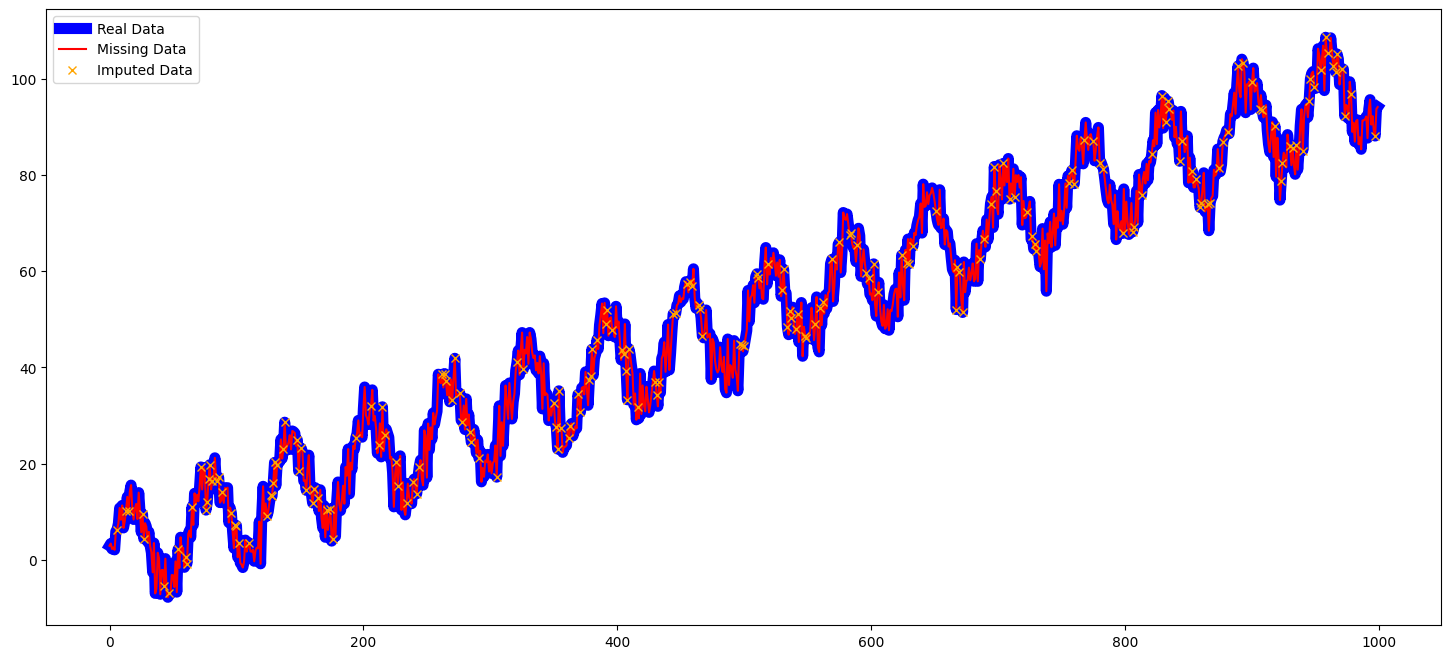

In [13]:
print("Spline Interpolation Imputation derivative order = 0")
util.plot(SeasonalTrend_Data, SeasonalTrend_Data_NAs, SeasonalTrend_Data_NAs_Spline)

In [14]:
SeasonalTrend_Data_NAs_Spline2 = splineInterpolation.inputTrainingData(SeasonalTrend_Data, derivate_order=2)


Spline Interpolation Imputation derivative order = 2


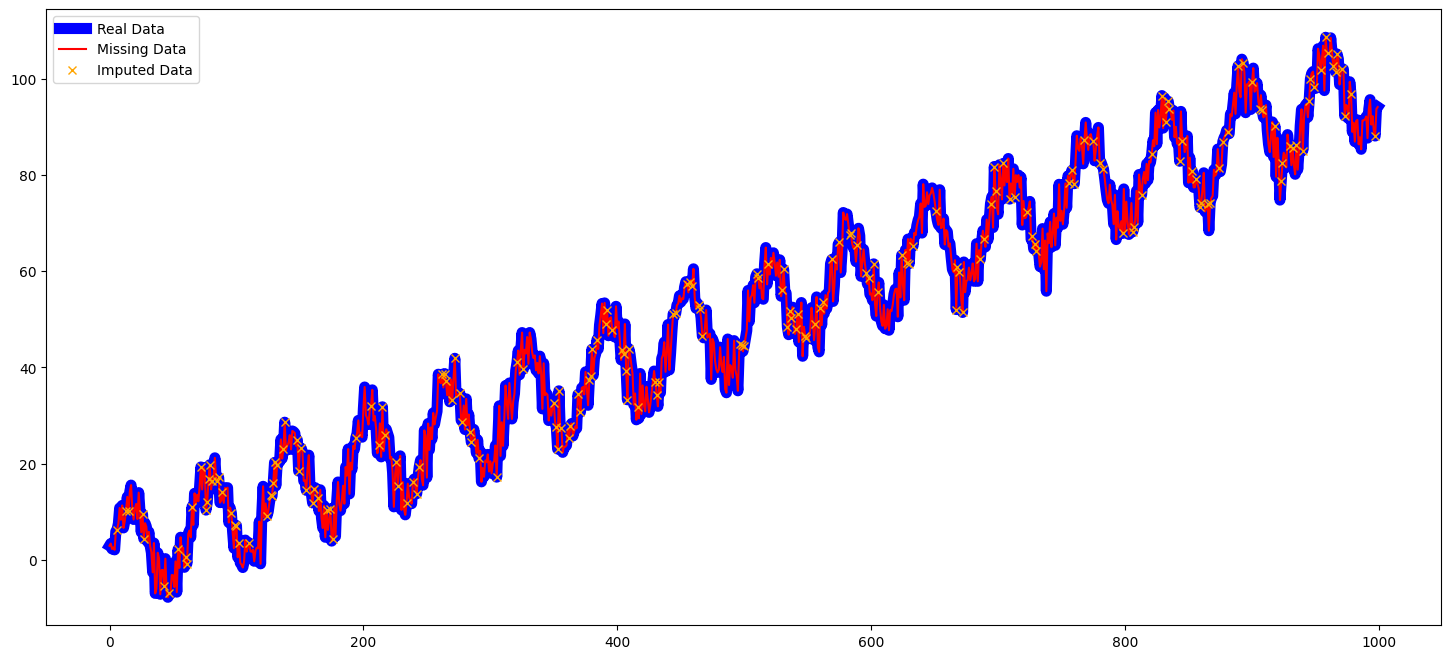

In [15]:
print("Spline Interpolation Imputation derivative order = 2")
util.plot(SeasonalTrend_Data, SeasonalTrend_Data_NAs, SeasonalTrend_Data_NAs_Spline2)